## Matplotlib for Real Estate Investment Analysis

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy import stats
plt.style.use('seaborn')

real_estate_path = "data/combined_clean.csv"

# Read the data 
neighborhood_data = pd.read_csv(real_estate_path)
neighborhood_data

,id,propertyId,source,neighborhood_id,description,Title,neighborhood,nightPrice,numOfBaths,numOfBeds,...,zip,propertyType,lat,lon,capacityOfPeople,numOfRooms,reviewsCount,startRating,occupancy,nightsBooked
0,28612684,11695191.0,Airbnb,7877,Beautiful private studio by LAX and the ocean,NaN,Westchester/Playa Del Rey,124.0,1.0,2.0,...,90045.0,Apartment,33.959801,-118.405807,2.0,0.0,87.0,5.0,89.0,326.0
1,28612665,15915760.0,Airbnb,7877,"Beautiful & Private Home with Big Backyard, BB...",NaN,Westchester/Playa Del Rey,268.0,3.0,4.0,...,90045.0,House,33.964260,-118.398590,8.0,3.0,37.0,5.0,92.0,337.0
2,28612651,1650397.0,Airbnb,7877,LAXclose-modern&green guest Suite,NaN,Westchester/Playa Del Rey,115.0,0.5,4.0,...,90045.0,House,33.960190,-118.392761,6.0,1.0,437.0,5.0,68.0,248.0
3,28612691,16824550.0,Airbnb,7877,Studio in Westchester. Near LAX.,NaN,Westchester/Playa Del Rey,93.0,1.0,2.0,...,90045.0,Apartment,33.960659,-118.388420,3.0,0.0,302.0,5.0,99.0,364.0
4,28612677,17097814.0,Airbnb,7877,Private/Quiet Westside Residential House,NaN,Westchester/Playa Del Rey,90.0,1.0,2.0,...,90045.0,House,33.962341,-118.386002,4.0,1.0,139.0,5.0,97.0,355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,5965389,NaN,Regular,417433,NaN,143 S Avenue 54 #8,Hermon,NaN,1.0,2.0,...,90042.0,Apartment,34.106449,-118.196159,NaN,NaN,NaN,NaN,NaN,NaN
3307,5965391,NaN,Regular,417433,NaN,4589 Via Marisol #359,Hermon,NaN,2.0,2.0,...,90042.0,Apartment,34.099129,-118.182632,NaN,NaN,NaN,NaN,NaN,NaN
3308,5968654,NaN,Regular,417433,NaN,"Condominium - Los Angeles (City), CA",Hermon,NaN,2.0,2.0,...,90042.0,Apartment,34.097740,-118.185562,NaN,NaN,NaN,NaN,NaN,NaN
3309,5969828,NaN,Regular,417433,NaN,4589 Via Marisol #152,Hermon,NaN,2.0,2.0,...,90042.0,Apartment,34.099129,-118.182632,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# (JM code) Replace NaN with 0s; 
neighborhood_data.fillna(0, inplace = True, downcast = 'infer')
neighborhood_data[['nightPrice', 'Price','capacityOfPeople', 'numOfRooms', 'reviewsCount', 'startRating', 'occupancy', 'nightsBooked']].astype(int)
neighborhood_data

,id,propertyId,source,neighborhood_id,description,Title,neighborhood,nightPrice,numOfBaths,numOfBeds,...,zip,propertyType,lat,lon,capacityOfPeople,numOfRooms,reviewsCount,startRating,occupancy,nightsBooked
0,28612684,11695191,Airbnb,7877,Beautiful private studio by LAX and the ocean,0,Westchester/Playa Del Rey,124,1.0,2,...,90045,Apartment,33.959801,-118.405807,2,0,87,5,89,326
1,28612665,15915760,Airbnb,7877,"Beautiful & Private Home with Big Backyard, BB...",0,Westchester/Playa Del Rey,268,3.0,4,...,90045,House,33.964260,-118.398590,8,3,37,5,92,337
2,28612651,1650397,Airbnb,7877,LAXclose-modern&green guest Suite,0,Westchester/Playa Del Rey,115,0.5,4,...,90045,House,33.960190,-118.392761,6,1,437,5,68,248
3,28612691,16824550,Airbnb,7877,Studio in Westchester. Near LAX.,0,Westchester/Playa Del Rey,93,1.0,2,...,90045,Apartment,33.960659,-118.388420,3,0,302,5,99,364
4,28612677,17097814,Airbnb,7877,Private/Quiet Westside Residential House,0,Westchester/Playa Del Rey,90,1.0,2,...,90045,House,33.962341,-118.386002,4,1,139,5,97,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,5965389,0,Regular,417433,0,143 S Avenue 54 #8,Hermon,0,1.0,2,...,90042,Apartment,34.106449,-118.196159,0,0,0,0,0,0
3307,5965391,0,Regular,417433,0,4589 Via Marisol #359,Hermon,0,2.0,2,...,90042,Apartment,34.099129,-118.182632,0,0,0,0,0,0
3308,5968654,0,Regular,417433,0,"Condominium - Los Angeles (City), CA",Hermon,0,2.0,2,...,90042,Apartment,34.097740,-118.185562,0,0,0,0,0,0
3309,5969828,0,Regular,417433,0,4589 Via Marisol #152,Hermon,0,2.0,2,...,90042,Apartment,34.099129,-118.182632,0,0,0,0,0,0


In [4]:
# Notes: nightPrice = AirBnb per NIGHT rate  &  Price = Regular rental per MONTH rate
impt_neighbh_data = neighborhood_data[['id','source','neighborhood', 'propertyType', 'nightPrice', 'Price', 'occupancy']]
impt_neighbh_data

,id,source,neighborhood,propertyType,nightPrice,Price,occupancy
0,28612684,Airbnb,Westchester/Playa Del Rey,Apartment,124,0,89
1,28612665,Airbnb,Westchester/Playa Del Rey,House,268,0,92
2,28612651,Airbnb,Westchester/Playa Del Rey,House,115,0,68
3,28612691,Airbnb,Westchester/Playa Del Rey,Apartment,93,0,99
4,28612677,Airbnb,Westchester/Playa Del Rey,House,90,0,97
...,...,...,...,...,...,...,...
3306,5965389,Regular,Hermon,Apartment,0,1800,0
3307,5965391,Regular,Hermon,Apartment,0,2495,0
3308,5968654,Regular,Hermon,Apartment,0,2950,0
3309,5969828,Regular,Hermon,Apartment,0,2395,0


In [5]:
# (JM code) Factor multiplier converts nightly rates into monthly rates. Multiplier is derived from the average yearly occupancy. Assume this rate for a month: (30 days * 60% = 18 days) - only for AirBnb Rentals
multiplier = 18
impt_neighbh_data['Final_mthly_price'] = impt_neighbh_data['nightPrice']*multiplier + impt_neighbh_data['Price']
impt_neighbh_data[['id','source','neighborhood', 'propertyType', 'Final_mthly_price']]

<ipython-input-5-a0c323147029>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impt_neighbh_data['Final_mthly_price'] = impt_neighbh_data['nightPrice']*multiplier + impt_neighbh_data['Price']


,id,source,neighborhood,propertyType,Final_mthly_price
0,28612684,Airbnb,Westchester/Playa Del Rey,Apartment,2232
1,28612665,Airbnb,Westchester/Playa Del Rey,House,4824
2,28612651,Airbnb,Westchester/Playa Del Rey,House,2070
3,28612691,Airbnb,Westchester/Playa Del Rey,Apartment,1674
4,28612677,Airbnb,Westchester/Playa Del Rey,House,1620
...,...,...,...,...,...
3306,5965389,Regular,Hermon,Apartment,1800
3307,5965391,Regular,Hermon,Apartment,2495
3308,5968654,Regular,Hermon,Apartment,2950
3309,5969828,Regular,Hermon,Apartment,2395


In [6]:
# (JM Code) Remove "Other" from propertyType (not a type of property we want to invest in)
impt_neighbh_data = impt_neighbh_data[impt_neighbh_data['propertyType'] != 'Other']
impt_neighbh_data

,id,source,neighborhood,propertyType,nightPrice,Price,occupancy,Final_mthly_price
0,28612684,Airbnb,Westchester/Playa Del Rey,Apartment,124,0,89,2232
1,28612665,Airbnb,Westchester/Playa Del Rey,House,268,0,92,4824
2,28612651,Airbnb,Westchester/Playa Del Rey,House,115,0,68,2070
3,28612691,Airbnb,Westchester/Playa Del Rey,Apartment,93,0,99,1674
4,28612677,Airbnb,Westchester/Playa Del Rey,House,90,0,97,1620
...,...,...,...,...,...,...,...,...
3306,5965389,Regular,Hermon,Apartment,0,1800,0,1800
3307,5965391,Regular,Hermon,Apartment,0,2495,0,2495
3308,5968654,Regular,Hermon,Apartment,0,2950,0,2950
3309,5969828,Regular,Hermon,Apartment,0,2395,0,2395


In [7]:
#Set list of target neighborhoods
list_target_neighbhs = ["Downtown", "Encino", "Hollywood", "Mar Vista", "Pacific Palisades", "Silver Lake", "South Los Angeles", "Studio City", "Venice", "Westwood"]

# FINAL DATAFRAME to use for Matplotlib containing just 10 neighborhoods of interest
target_neighbh_df = impt_neighbh_data.loc[
                      (impt_neighbh_data['neighborhood'] == list_target_neighbhs[0]) |
                      (impt_neighbh_data['neighborhood'] == list_target_neighbhs[1]) |
                      (impt_neighbh_data['neighborhood'] == list_target_neighbhs[2]) |
                      (impt_neighbh_data['neighborhood'] == list_target_neighbhs[3]) |
                      (impt_neighbh_data['neighborhood'] == list_target_neighbhs[4]) |
                      (impt_neighbh_data['neighborhood'] == list_target_neighbhs[5]) |
                      (impt_neighbh_data['neighborhood'] == list_target_neighbhs[6]) |
                      (impt_neighbh_data['neighborhood'] == list_target_neighbhs[7]) |
                      (impt_neighbh_data['neighborhood'] == list_target_neighbhs[8]) |
                      (impt_neighbh_data['neighborhood'] == list_target_neighbhs[9])]
target_neighbh_df

,id,source,neighborhood,propertyType,nightPrice,Price,occupancy,Final_mthly_price
54,28612443,Airbnb,Pacific Palisades,House,832,0,88,14976
55,28612467,Airbnb,Pacific Palisades,Apartment,85,0,77,1530
56,28612449,Airbnb,Pacific Palisades,House,128,0,84,2304
57,28612454,Airbnb,Pacific Palisades,House,338,0,43,6084
58,28612432,Airbnb,Pacific Palisades,House,153,0,29,2754
...,...,...,...,...,...,...,...,...
2719,5292684,Regular,Silver Lake,Apartment,0,2095,0,2095
2720,5292685,Regular,Silver Lake,Apartment,0,2100,0,2100
2721,5292686,Regular,Silver Lake,Apartment,0,2100,0,2100
2722,5292689,Regular,Silver Lake,Apartment,0,2199,0,2199


In [8]:
# Shows the number of datapoints for each RENTAL OPTION (value counts)
# Use for indexing in generating values for histogram, bar graph 1 (avg income by property type), bar graph 2 (avg income by neighborhood)
index_source = target_neighbh_df["source"].value_counts().index

### Summary Statistics for Monthly AirBnb Rental Price

In [9]:
# Filter Airbnb monthly rental price
filterAirbnb = target_neighbh_df.loc[target_neighbh_df["source"] == index_source[0], ["source", "Final_mthly_price"]]

# Monthly Rental Income for AirBnb rentals (use in histogram)
mthlyRI_Airbnb = filterAirbnb["Final_mthly_price"]
mthlyRI_Airbnb

54      14976
55       1530
56       2304
57       6084
58       2754
        ...  
1277    17820
1278     3816
1279     2808
1282     2106
1342     2394
Name: Final_mthly_price, Length: 220, dtype: int64

In [10]:
# Mean, median & mode for AirBnb monthly rental income 
mean_AirBnb = np.mean(mthlyRI_Airbnb)
median_AirBnb = np.median(mthlyRI_Airbnb)
mode_AirBnb = stats.mode(mthlyRI_Airbnb, axis=0)
std_AirBnb = mthlyRI_Airbnb.std()

### Histogram for AirBnb Rental

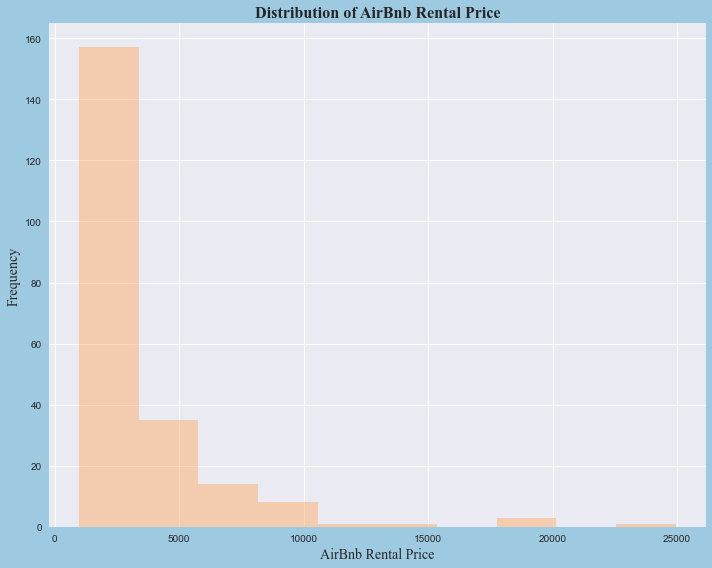

In [11]:
# Set figure size, color and font style
plt.figure(figsize=(10, 8), facecolor="#9ecae1")
tnr_font = {'fontname':'Times New Roman'}

# Plot histogram, set labels, titles, and other formatting elements
plt.hist(mthlyRI_Airbnb, color="#fdae6b", alpha=0.5)
plt.xlabel('AirBnb Rental Price', **tnr_font, fontsize=14)
plt.ylabel('Frequency', **tnr_font, fontsize=14)
plt.title("Distribution of AirBnb Rental Price", fontsize=16, **tnr_font, weight="bold")
plt.tight_layout()

# Save image as png 
plt.savefig("images/airbnb_histogram.png")
plt.show()

In [12]:
print(stats.normaltest(mthlyRI_Airbnb.sample(100)))

NormaltestResult(statistic=99.03535290421961, pvalue=3.1242541845465294e-22)


In [13]:
assert stats.normaltest(mthlyRI_Airbnb.sample(100)).pvalue >= .05, "Dataset may not be normally distributed"

AssertionError: Dataset may not be normally distributed

### Summary Statistics for Monthly Regular Rental Price

In [14]:
# Filter Regular monthly rental price
filterRegular = target_neighbh_df.loc[target_neighbh_df["source"] == index_source[1], ["source", "Final_mthly_price"]]

# Monthly Rental Income for Regular rentals (use in histogram)
mthlyRI_Regular = filterRegular["Final_mthly_price"]
mthlyRI_Regular

1591     4595
1593     8500
1595    10500
1596     3975
1599    23950
        ...  
2719     2095
2720     2100
2721     2100
2722     2199
2723     2225
Name: Final_mthly_price, Length: 176, dtype: int64

In [15]:
# Mean, median & mode for Regular monthly rental income
mean_Regular = np.mean(mthlyRI_Regular)
median_Regular = np.median(mthlyRI_Regular)
mode_Regular = stats.mode(mthlyRI_Regular)
std_Regular = mthlyRI_Regular.std()

### Histogram for Regular Rental

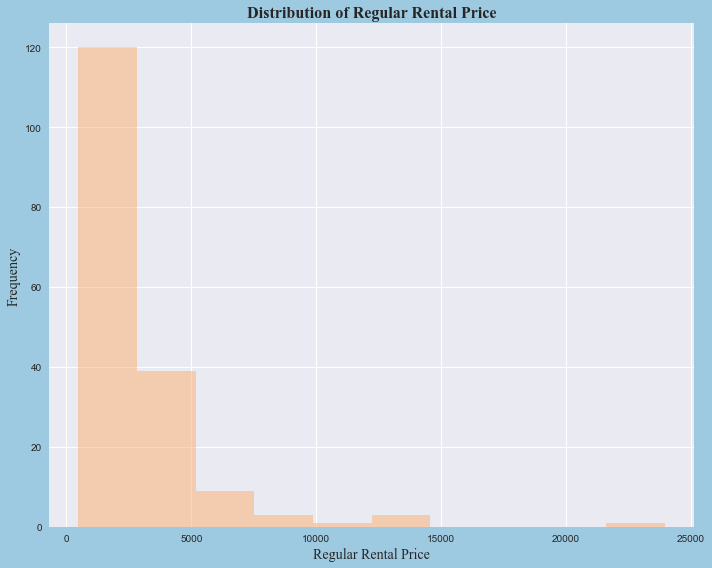

In [16]:
# Set figure size, color and font style
plt.figure(figsize=(10, 8), facecolor="#9ecae1")

# Plot histogram, set labels, titles and other formatting elements
plt.hist(mthlyRI_Regular, alpha=0.5, color="#fdae6b")
plt.xlabel('Regular Rental Price',  **tnr_font, fontsize=14)
plt.ylabel('Frequency', **tnr_font, fontsize=14)
plt.title("Distribution of Regular Rental Price", fontsize=16, **tnr_font, weight="bold")
plt.tight_layout()

# Save image as png 
plt.savefig("images/regular_histogram.png")
plt.show()

In [17]:
print(stats.normaltest(mthlyRI_Regular.sample(100)))

NormaltestResult(statistic=119.58274471331256, pvalue=1.0787900199653828e-26)


In [18]:
assert stats.normaltest(mthlyRI_Regular.sample(100)).pvalue >= .05, "Dataset may not be normally distributed"

AssertionError: Dataset may not be normally distributed

## Quartiles, Outliers and Boxplots

#### Calculation of IQRs of 2 Rental Options: AirBnb vs Regular 

In [19]:
#AirBnb Quartiles & IQR
AirBnb_quart = mthlyRI_Airbnb.quantile([.25,.5,.75])
AirB_lowerq = AirBnb_quart[0.25]
AirB_upperq = AirBnb_quart[0.75]
AirBnb_IQR = AirB_upperq-AirB_lowerq

In [20]:
#Regular Quartiles & IQR
Regular_quart = mthlyRI_Regular.quantile([.25,.5,.75])
Reg_lowerq = Regular_quart[0.25]
Reg_upperq = Regular_quart[0.75]
Regular_IQR = Reg_upperq-Reg_lowerq

In [21]:
#Creates a list  of results (for summary df use only)
Quart1 = [AirB_lowerq, Reg_lowerq]
Quart3 = [AirB_upperq, Reg_upperq]
IQR = [AirBnb_IQR, Regular_IQR]

In [22]:
#Creates a df for the Summary Results of all Quartiles and IQRs of the 4 promising drug regimens (OPTIONAL)
rental_options = ["AirBnb", "Regular"]
mean_RI = [mean_AirBnb, mean_Regular]
median_RI = [median_AirBnb, median_Regular]
mode_RI = [mode_AirBnb, mode_Regular]
std_RI = [std_AirBnb, std_Regular]

Final_Stats = pd.DataFrame({ 
    'Rental Options': rental_options,
    'Average Monthly Rental Price': mean_RI,
    'Median Monthly Rental Price': median_RI,
    'Popular(mode) Monthly Rental Price': mode_RI,
    'Standard Deviation': std_RI,
    '1st Quartile': Quart1,
    '3rd Quartile': Quart3,
    'IQR': IQR
})
Final_Stats           

,Rental Options,Average Monthly Rental Price,Median Monthly Rental Price,Popular(mode) Monthly Rental Price,Standard Deviation,1st Quartile,3rd Quartile,IQR
0,AirBnb,3429.327273,2430.0,"([2052], [6])",3127.392200,1831.5,3609.0,1777.5
1,Regular,2815.028409,1925.0,"([1895], [5])",2689.289619,1450.0,3212.5,1762.5


### Box and Whisker Plots

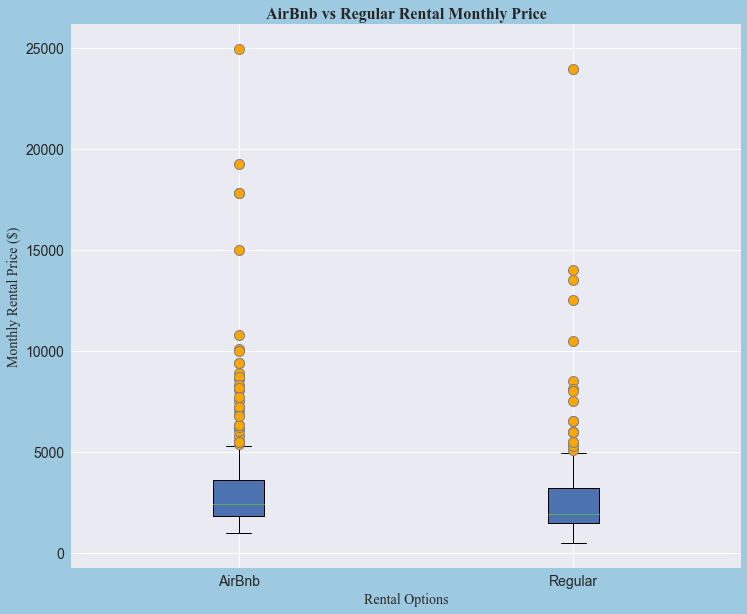

In [23]:
# Set figure size, color and other aesthetics
plt.figure(figsize=(12, 10), facecolor="#9ecae1")
flierprops = dict(marker='o', markerfacecolor='orange', markersize=10, linestyle='none', markeredgecolor='grey')

# Plots boxplot 
boxplot_data = [mthlyRI_Airbnb, mthlyRI_Regular]
plt.boxplot(boxplot_data, meanline=True, patch_artist=True, whis=1.0, showfliers=True, flierprops=flierprops)

# Set labels, titles and other formatting elements
plt.title('AirBnb vs Regular Rental Monthly Price', fontsize=16, **tnr_font, weight="bold")
plt.ylabel('Monthly Rental Price ($)', fontsize=14, **tnr_font)
plt.xlabel('Rental Options', fontsize=14, **tnr_font)
#plt.tight_layout()

#Modify tick locations and formatting
x_axis = np.arange(len(boxplot_data))
tick_positions = [1+value for value in x_axis]
plt.xticks(tick_positions, rental_options, fontsize=14)
plt.yticks(fontsize=14)

# Save image as png 
plt.savefig("images/boxplot.png")
plt.show()

##### AirBnb & Regular Rental Source Filters

In [24]:
#Airbnb filter (for use in: outlier analysis & bar plot 1&2)
type1 = target_neighbh_df['source']== index_source[0] 
type1_filter = target_neighbh_df.loc[type1, :]

#Filters Regular Rentals (for use in: bar plot 1&2, may use if want to analyze outliers in Regular Rentals)
type2 = target_neighbh_df['source']== index_source[1] 
type2_filter = target_neighbh_df.loc[type2, :]

#### Analysis of the Outliers

In [25]:
#Calculates the 3rd Quartile boundary; 
Final_Stats['Q3 Boundary'] = Final_Stats["3rd Quartile"] + (1.5*Final_Stats["IQR"])
Q3_index = Final_Stats.set_index("Rental Options")
Q3_index

,Average Monthly Rental Price,Median Monthly Rental Price,Popular(mode) Monthly Rental Price,Standard Deviation,1st Quartile,3rd Quartile,IQR,Q3 Boundary
Rental Options,,,,,,,,
AirBnb,3429.327273,2430.0,"([2052], [6])",3127.392200,1831.5,3609.0,1777.5,6275.25
Regular,2815.028409,1925.0,"([1895], [5])",2689.289619,1450.0,3212.5,1762.5,5856.25


In [26]:
#Filters AirBnb & Regular Rental outlier boundary
AirBnb_upperbound = Q3_index.loc["AirBnb", "Q3 Boundary"]
Regular_upperbound =  Q3_index.loc["Regular", "Q3 Boundary"]

In [27]:
#Filter all AirBnb avg rental price >= 3rd Quartile boundary
AirBnb_outliers = type1_filter['Final_mthly_price']>= AirBnb_upperbound
AirB_outlier_filter = type1_filter.loc[AirBnb_outliers, ['id','neighborhood','Final_mthly_price']]
AirB_outlier_filter

,id,neighborhood,Final_mthly_price
54,28612443,Pacific Palisades,14976
59,28612461,Pacific Palisades,8064
61,28612436,Pacific Palisades,8604
63,28612439,Pacific Palisades,7524
65,28612480,Pacific Palisades,10080
67,28612492,Pacific Palisades,9378
68,28612496,Pacific Palisades,8892
71,28612514,Pacific Palisades,24948
77,28613595,Venice,7056
80,28613163,Venice,10764


In [28]:
#To check the count of outliers for each neighborhood
by_neighbhd_outliers = AirB_outlier_filter.groupby(["neighborhood"])["id"].nunique()
by_neighbhd_outliers

neighborhood
Downtown             2
Encino               1
Mar Vista            2
Pacific Palisades    8
Silver Lake          1
Studio City          2
Venice               7
Westwood             2
Name: id, dtype: int64

In [29]:
#For pie graph
AirB_outlier_neighbhds =AirB_outlier_filter["neighborhood"].unique()
sorted_AirB_outlier_neighbhds = sorted(AirB_outlier_neighbhds)
sorted_AirB_outlier_neighbhds

['Downtown',
 'Encino',
 'Mar Vista',
 'Pacific Palisades',
 'Silver Lake',
 'Studio City',
 'Venice',
 'Westwood']

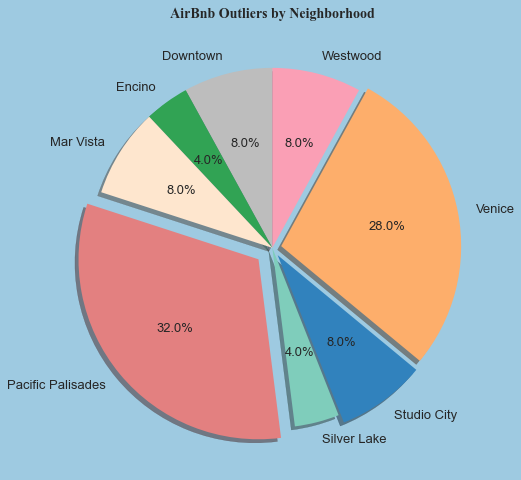

In [30]:
# Set figure size, color, title and other aesthetics
plt.figure(figsize=(10, 7), facecolor="#9ecae1")
explode = (0, 0, 0, 0.1, 0, 0.05, 0.05, 0)
colors = ["#bdbdbd","#31a354","#fee6ce", "#e38080","#7fcdbb", "#3182bd", "#fdae6b", "#fa9fb5"]
text_props = {'fontsize':13}
plt.title('AirBnb Outliers by Neighborhood', fontsize=14, **tnr_font, weight="bold")
plt.tight_layout()

#Plots  graph
plt.pie(by_neighbhd_outliers, labels=sorted_AirB_outlier_neighbhds,
        colors=colors, autopct="%1.1f%%", explode=explode,
        startangle=90, shadow=True, textprops=text_props)

# Save image as png 
plt.savefig("images/outlier_pie.png")
plt.show()

#### Pie Charts: Airbnb vs Regular Occupancy Rates

In [31]:
# Group by df by source
byRental_options = target_neighbh_df.groupby(["source"])

# Data to be used in pie chart
unique_count_OR = byRental_options["id"].nunique()

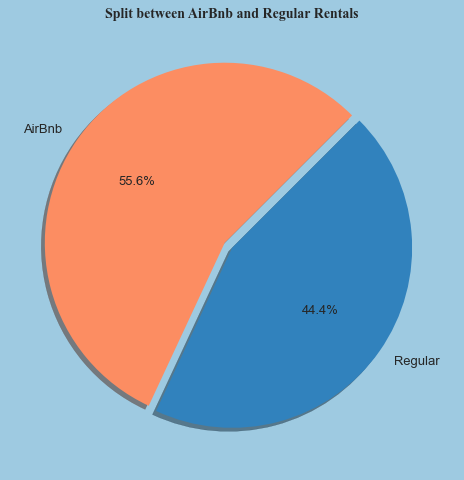

In [32]:
# Set figure size, color, title and other aesthetics
plt.figure(figsize=(7, 7), facecolor="#9ecae1")
explode = (0.05, 0)
colors = ["#fc8d62","#3182bd"]
text_props = {'fontsize':13}
plt.title('Split between AirBnb and Regular Rentals', fontsize=14, **tnr_font, weight="bold")
plt.tight_layout()

#Plots  graph
plt.pie(unique_count_OR, labels=['AirBnb','Regular'],
        colors=colors, explode=explode, autopct="%1.1f%%",
        startangle=45, shadow=True, textprops=text_props)

# Save image as png 
plt.savefig("images/pie.png")
plt.show()

### Bar Plot 1: Compare AirBnb & Regular Average Rental Price by Property Type

In [33]:
#Groups data by property type and source & calculates average rental income 
#Only used as reference to make sure array generated for the bar graph is correct
AvgRI_byptype = target_neighbh_df.groupby(['propertyType','source'])['Final_mthly_price'].mean().astype(int)
AvgRI_byptype

propertyType  source 
Apartment     Airbnb     2312
              Regular    2262
Condominium   Airbnb     2992
House         Airbnb     4318
              Regular    5259
Townhouse     Airbnb     3087
              Regular    3134
Name: Final_mthly_price, dtype: int32

In [34]:
# Groups data by property type & calculates average monthly price
AirB_avgprice = type1_filter.groupby(['propertyType'])['Final_mthly_price'].mean().values.astype(int)
AirB_avgprice

array([2312, 2992, 4318, 3087])

In [35]:
# Groups data by property type & calculates average monthly price
Reg_avgprice = type2_filter.groupby(['propertyType'])['Final_mthly_price'].mean().values.astype(int)
Reg_avgprice

array([2262, 5259, 3134])

In [36]:
# Shows & sorts target neighborhoods (for bar graph 1 use)
unique_ptype = target_neighbh_df['propertyType'].unique()
sorted_ptype = sorted(unique_ptype)
sorted_ptype

['Apartment', 'Condominium', 'House', 'Townhouse']

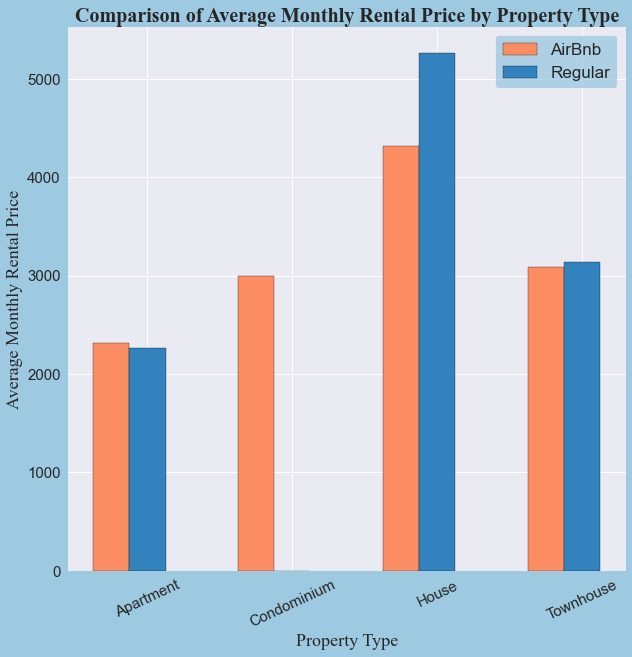

In [37]:
#Set figure & color
plt.figure(figsize=(10,10), facecolor="#9ecae1")

#Use for plotting
width_bar = 0.25
n_ptypes = 4
index = np.arange(n_ptypes)

#Fixes value error due to Condominium (Regular)=0; added 0 to match the length of AirBnb bar
Reg_avgprice2 = (2262, 0, 5259, 3134)

#plotting each bars
plt.bar(index, AirB_avgprice, width_bar, edgecolor='black', label="AirBnb", color='#fc8d62')
plt.bar(index + width_bar, Reg_avgprice2, width_bar, edgecolor='black', label="Regular", color='#3182bd')

#Adds titles, axis labels, and legend with modifications in font styles and size
plt.title('Comparison of Average Monthly Rental Price by Property Type', fontsize=20, **tnr_font, weight="bold")
plt.xlabel('Property Type', fontsize=18, **tnr_font)
plt.ylabel('Average Monthly Rental Price', fontsize=18, **tnr_font)
plt.legend(fontsize=17, frameon=True, facecolor="#9ecae1")
#plt.tight_layout()

#Set tick location to center
plt.xticks(index + width_bar, sorted_ptype, rotation=25, fontsize=15)
plt.yticks(fontsize=15)

# Save image as png 
plt.savefig("images/bar_type.png")
plt.show()

In [38]:
#Confirmation that there are no Regular Rentals for Condo 
test = target_neighbh_df["propertyType"] == "Condominium" 
Condo_price = target_neighbh_df.loc[test, ["source","Final_mthly_price"]]
Condo_price

,source,Final_mthly_price
87,Airbnb,5526
360,Airbnb,4590
416,Airbnb,2160
417,Airbnb,2700
426,Airbnb,2394
428,Airbnb,3582
827,Airbnb,2430
840,Airbnb,2088
844,Airbnb,2628
1267,Airbnb,2430


In [39]:
#Confirmation for Apartment (that there's Airbnb & Regular)
test2 = target_neighbh_df["propertyType"] == "Apartment" 
Apt_price = target_neighbh_df.loc[test2, ["source","Final_mthly_price"]]
Apt_price

,source,Final_mthly_price
55,Airbnb,1530
64,Airbnb,2070
70,Airbnb,3636
75,Airbnb,1548
78,Airbnb,1872
...,...,...
2719,Regular,2095
2720,Regular,2100
2721,Regular,2100
2722,Regular,2199


### Bar Plot 2: Compare AirBnb and Regular Average Rental Price by Neighborhoods

In [40]:
#Groups data by neighborhood and source & calculates average rental income 
#Only used as reference to make sure array generated for the bar graph is correct
AvgRI_byneighbh = target_neighbh_df.groupby(['neighborhood','source'])['Final_mthly_price'].mean().astype(int)
AvgRI_byneighbh

neighborhood       source 
Downtown           Airbnb      2994
                   Regular     2805
Encino             Airbnb      2892
                   Regular     1823
Hollywood          Airbnb      2342
                   Regular     2203
Mar Vista          Airbnb      2582
                   Regular     2584
Pacific Palisades  Airbnb      6524
                   Regular    10235
Silver Lake        Airbnb      2803
                   Regular     2165
South Los Angeles  Regular     1208
Studio City        Airbnb      4130
                   Regular     3342
Venice             Airbnb      4588
                   Regular     4384
Westwood           Airbnb      2952
                   Regular     1758
Name: Final_mthly_price, dtype: int32

#### AirBnb Avg Rental Price Values

In [41]:
# Airbnb (used same filter for AirBnb in bar graph 1)
# Groups data by neighborhoods & calculates average monthly price
AirB_byneighbh = type1_filter.groupby(['neighborhood'])['Final_mthly_price'].mean().values.astype(int)
AirB_byneighbh

array([2994, 2892, 2342, 2582, 6524, 2803, 4130, 4588, 2952])

In [42]:
#Regular (used same filter for Regular in bar graph 1)
# Groups data by neighborhoods & calculates average monthly price
Reg_byneighbh = type2_filter.groupby(['neighborhood'])['Final_mthly_price'].mean().values.astype(int)
Reg_byneighbh

array([ 2805,  1823,  2203,  2584, 10235,  2165,  1208,  3342,  4384,
        1758])

In [43]:
#Use in xticks for bar 2 graph
unique_neighbh = target_neighbh_df['neighborhood'].unique()
sorted_neighbhlist = sorted(unique_neighbh)
sorted_neighbhlist

['Downtown',
 'Encino',
 'Hollywood',
 'Mar Vista',
 'Pacific Palisades',
 'Silver Lake',
 'South Los Angeles',
 'Studio City',
 'Venice',
 'Westwood']

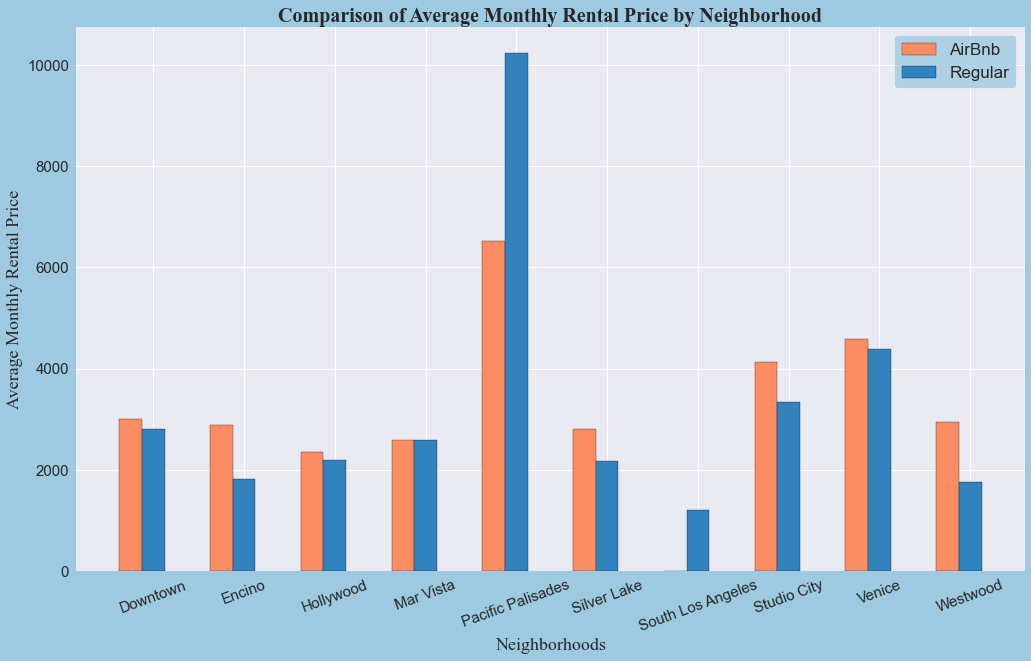

In [44]:
#Sets figure and bar size first before plotting
plt.figure(figsize=(17, 10), facecolor="#9ecae1")
width_bar = 0.25
n_neighbh = 10
index_neighbh = np.arange(n_neighbh)

#Fixes value error due to South LA (AirBnb)=0; added 0 to match the length of Regular array  bar
AirB_byneighbh2 = (2994, 2892, 2342, 2582, 6524, 2803, 0, 4130, 4588, 2952)     

#plotting each bars
plt.bar(index_neighbh, AirB_byneighbh2, width_bar, edgecolor='black', label='AirBnb', color='#fc8d62')
plt.bar(index_neighbh + width_bar, Reg_byneighbh, width_bar, edgecolor='black', label="Regular", color='#3182bd')

#Adds titles, axis labels, and legend with modifications in font style and size
plt.title('Comparison of Average Monthly Rental Price by Neighborhood', fontsize=20, **tnr_font, weight="bold")
plt.xlabel("Neighborhoods", fontsize=18, **tnr_font)
plt.ylabel('Average Monthly Rental Price', fontsize=18, **tnr_font)
plt.legend(fontsize=17, frameon=True, facecolor="#9ecae1")
#plt.tight_layout()

#Set tick location & format
plt.xticks(index_neighbh + width_bar, sorted_neighbhlist, rotation=20, fontsize=15)
plt.yticks(fontsize=15)

# Save image as png 
plt.savefig("images/bar_neighbh.png")
plt.show()